# Various Techniques of Feature Engineering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_classif

## Imputation

In [ ]:
data = pd.read_csv('../data/penguins.csv')

In [ ]:
data.head()

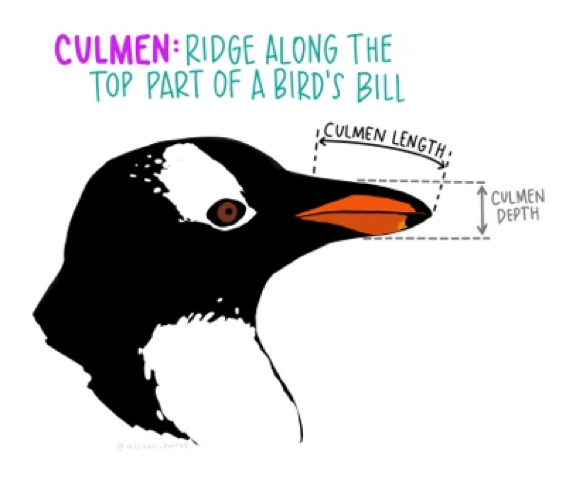

In [ ]:
data.shape

In [ ]:
data.describe()

In [ ]:
# cont the missing values
print(data.isnull().sum())

### Option 1: Droping Missing and NA Values

In [ ]:
# drop and check again with the functions from above
data = data.dropna()

In [ ]:
data.shape

In [ ]:
data.sample(5)

### Option 2: Replacing with New Value

In [ ]:
# alternatively, replace them with a new value
data = pd.read_csv('../data/penguins.csv')

In [ ]:
# replacing with zero?
data = data.fillna(0)

In [ ]:
data.head()

In [ ]:
# better way
data = pd.read_csv('../data/penguins.csv')

In [ ]:
data['sex'].value_counts().index[0]

In [ ]:
data['culmen_length_mm'] = data['culmen_length_mm'].fillna((data['culmen_length_mm'].mean()))
data['culmen_depth_mm'] = data['culmen_depth_mm'].fillna((data['culmen_depth_mm'].mean()))
data['flipper_length_mm'] = data['flipper_length_mm'].fillna((data['flipper_length_mm'].mean()))
data['body_mass_g'] = data['body_mass_g'].fillna((data['body_mass_g'].mean()))
data['sex'] = data['sex'].fillna((data['sex'].value_counts().index[0]))

In [ ]:
data.head()

### Damaged Values

In [ ]:
data

In [ ]:
# check for wrong data in column 'sex'
data.loc[(data['sex'] != 'FEMALE') & (data['sex'] != 'MALE')]

In [ ]:
# remove specific row
data = data.drop([336])

In [ ]:
data.reset_index()
data.tail(10)

## Categorical Encoding

In [ ]:
# check the features type
data.dtypes

In [ ]:
# assign a type category for use with qualitative data
data["species"] = data["species"].astype('category')
data["island"] = data["island"].astype('category')
data["sex"] = data["sex"].astype('category')

In [ ]:
data.dtypes

In [ ]:
# select the names of the columns with category data, exclude the numeric
cat_data = data.select_dtypes(exclude=[np.number]).columns

In [ ]:
cat_data

In [ ]:
# print these columns only
# categorical_data = data.drop(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'], axis=1)
data[cat_data].head()

In [ ]:
# store it in a new data frame
categorical_data = data[cat_data]
categorical_data

### Label Encoding
For each categorical feature, gets the unique occurances and encodes them with an increment number

In [ ]:
categorical_data["species_cat"] = categorical_data["species"].cat.codes
categorical_data["island_cat"] = categorical_data["island"].cat.codes
categorical_data["sex_cat"] = categorical_data["sex"].cat.codes

In [ ]:
categorical_data.sample(5)

In [ ]:
# drop the coded columns to try different encoding
categorical_data = categorical_data.drop(['species_cat', 'sex_cat', 'island_cat'], axis=1)
categorical_data

### One-Hot Encoding
Replaces each categorical column with two or more new columns - one for each unique value. Places '1' (True) in one of the new columns and '0' (False) elsewhere.

In [ ]:
# generate new columns
encoded_species = pd.get_dummies(categorical_data['species'])
encoded_island = pd.get_dummies(categorical_data['island'])
encoded_sex = pd.get_dummies(categorical_data['sex'])

In [ ]:
encoded_species

In [ ]:
one_hot = pd.get_dummies(data, columns = ['species', 'island', 'sex'])

In [ ]:
one_hot

### Count Encoding
Conts the unique occurances and uses this number for encoding

In [ ]:
# count appearance
categorical_data = data.drop(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'], axis=1)

In [ ]:
species_count = categorical_data['species'].value_counts()
island_count = categorical_data['island'].value_counts()
sex_count = categorical_data['sex'].value_counts()

In [ ]:
sex_count

In [ ]:
categorical_data['species_count_enc'] = categorical_data['species'].map(species_count)
categorical_data['island_count_enc'] = categorical_data['island'].map(island_count)
categorical_data['sex_count_enc'] = categorical_data['sex'].map(sex_count)

In [ ]:
categorical_data.sample(5)

In [ ]:
species_count

### Target Encoding

In [ ]:
# splitting into categories and calculating mean for each
categorical_data = data.drop(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'], axis=1)

In [ ]:
categorical_data["species"] = categorical_data["species"].cat.codes

In [ ]:
categorical_data.sample(5)

In [ ]:
island_means = categorical_data.groupby('island', observed=True)['species'].mean()
sex_means = categorical_data.groupby('sex', observed=True)['species'].mean()

In [ ]:
island_means

In [ ]:
sex_means

In [ ]:
# replace all categorical with the means per category
categorical_data['island_target_enc'] = categorical_data['island'].map(island_means)
categorical_data['sex_target_enc'] = categorical_data['sex'].map(sex_means)
categorical_data

## Detecting and Handling Outliers

In [ ]:
data["species"] = data["species"].cat.codes

In [ ]:
data

In [ ]:
fig, axes = plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(10, 30)
sb.boxplot(data=data,y="culmen_length_mm",x="species",orient="v",ax=axes[0], palette="Oranges", hue = "species")
sb.boxplot(data=data,y="culmen_depth_mm",x="species",orient="v",ax=axes[1], palette="Oranges", hue = "species")
sb.boxplot(data=data,y="flipper_length_mm",x="species",orient="v",ax=axes[2], palette="Oranges", hue = "species")
sb.boxplot(data=data,y="body_mass_g",x="species",orient="v",ax=axes[3], palette="Oranges", hue = "species")

### Using Standard Deviation

In [ ]:
factor = 0.5
upper_lim = data['culmen_length_mm'].mean () + data['culmen_length_mm'].std () * factor
lower_lim = data['culmen_length_mm'].mean () - data['culmen_length_mm'].std () * factor

In [ ]:
no_outliers = data[(data['culmen_length_mm'] < upper_lim) & (data['culmen_length_mm'] > lower_lim)]
no_outliers

In [ ]:
no_outliers.shape

In [ ]:
data.shape

### Using Percentilles

In [ ]:
upper_lim = data['culmen_length_mm'].quantile(.95)
lower_lim = data['culmen_length_mm'].quantile(.05)

In [ ]:
no_outliers = data[(data['culmen_length_mm'] < upper_lim) & (data['culmen_length_mm'] > lower_lim)]
no_outliers

In [ ]:
outliers = pd.concat([data,no_outliers]).drop_duplicates(keep=False)
outliers

## Binning

In [ ]:
bin_data = data[['culmen_length_mm']]
bin_data['culmen_length_bin'] = pd.cut(data['culmen_length_mm'], bins=[0, 40, 50, 100], labels=["Low", "Mid", "High"])
bin_data

## Scaling

In [ ]:
# get statistics
scaled_data = data[['body_mass_g']]

print('Mean:', scaled_data['body_mass_g'].mean())
print('Standard Deviation:', scaled_data['body_mass_g'].std())

In [ ]:
# draw histogram to visualize them
sb.histplot(scaled_data['body_mass_g'], color='#ee4c2c', bins=50);

### Standard Scaling (Z-Score Transformation)

In [ ]:
# reduce all with the mean and scale the data to unit variance
# x = (x-xmean)/std
standard_scaler = StandardScaler()
scaled_data['body_mass_scaled'] = standard_scaler.fit_transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_scaled'].mean()) # almost 0
print('Standard Deviation:', scaled_data['body_mass_scaled'].std()) # almost 1

In [ ]:
# histogram has same shape, but 0,0 is in the middle
sb.histplot(scaled_data['body_mass_scaled'], color='#ee4c2c', bins=50);

### Min-Max Scalling - Normalization

In [ ]:
# transforms data to a fixed range, typically [0, 1] by mapping the min value to 0 and the max to 1
# x = x-xmin)/(xmax-xmin)
minmax_scaler = MinMaxScaler()
scaled_data['body_mass_min_max_scaled'] = minmax_scaler.fit_transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_min_max_scaled'].mean())
print('Standard Deviation:', scaled_data['body_mass_min_max_scaled'].std())

In [ ]:
# values are in [0, 1]
sb.histplot(scaled_data['body_mass_min_max_scaled'], color='#ee4c2c', bins=50);

In [ ]:
qtrans = QuantileTransformer()
scaled_data['body_mass_q_trans_uniform'] = qtrans.fit_transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_q_trans_uniform'].mean())
print('Standard Deviation:', scaled_data['body_mass_q_trans_uniform'].std())

In [ ]:
sb.histplot(scaled_data['body_mass_q_trans_uniform'], color='#ee4c2c', bins=50);

### Transform Into Normal Distribution

In [ ]:
# maps the original values to a uniform distribution, spreading out the most frequent values and reducing the impact of outliers
qtrans = QuantileTransformer(output_distribution='normal', random_state=0)
scaled_data['body_mass_q_trans_normal'] = qtrans.fit_transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_q_trans_normal'].mean())
print('Standard Deviation:', scaled_data['body_mass_q_trans_normal'].std())

In [ ]:
sb.histplot(scaled_data['body_mass_q_trans_normal'], color='#ee4c2c', bins=50);

In [ ]:
scaled_data